In [2]:
# DNA SEQUENCE FROM KAGGLE
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [11]:
chimp_data = pd.read_table('chimp_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [12]:
dog_data = pd.read_table('dog_data.txt')
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [7]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [13]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [14]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [15]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values

In [17]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [18]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values

In [19]:
# NOW WE WILL APPLY THE BAG OF WORDS USING COUNTVECTORIZER USING NLP
# CREATING THE BAG OF WORDS USIGN MODEL COUNTVECTORIZER()
# THIS IS EQUIVALENT TO K-MER COUNTING
# THE N-GRAM SIZE OF 4 WAS PREVIOUSLY DETERMINED BY TESTING
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.fit_transform(chimp_texts)
X_dog = cv.fit_transform(dog_texts)

In [20]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 229684)
(820, 227149)


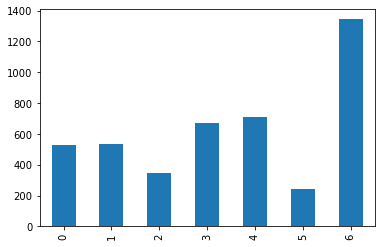

In [21]:
human_data['class'].value_counts().sort_index().plot.bar()

In [22]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [24]:
# MULTIMONIAL NAIVE BAYES CLASSIFIER
# THE ALPHA PARAMETER WAS DETERMINED BY GRID SERACH PREVIOUSLY
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [25]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Confusion matrix\n')
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict,average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1 = %.3f" %(accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
Accuracy = 0.984 
Precision = 0.984 
Recall = 0.984 
F1 = 0.984


In [28]:
# CHIMP-DATA
X_train, X_test, y_train, y_test = train_test_split(X_chimp, y_chimp, test_size=0.2, random_state=42)
# model training
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
# mdoel prediction
y_pred = classifier.predict(X_test)
# model performance statistics
print('Confusion matrix\n')
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1 = %.3f" %(accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118
Accuracy = 0.914 
Precision = 0.920 
Recall = 0.914 
F1 = 0.911


In [29]:
# DOG-DATA
X_train, X_test, y_train, y_test = train_test_split(X_dog, y_dog, test_size=0.2, random_state=42)
# model training
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
# mdoel prediction
y_pred = classifier.predict(X_test)
# model performance statistics
print('Confusion matrix\n')
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("Accuracy = %.3f \nPrecision = %.3f \nRecall = %.3f \nF1 = %.3f" %(accuracy, precision, recall, f1))

Confusion matrix

Predicted   0   1   2  3  4  5   6
Actual                            
0          21   0   0  0  0  0   6
1           2  12   0  0  0  0   5
2           1   0  10  0  0  0   3
3           1   0   0  8  0  0   7
4           3   0   0  2  7  0  11
5           2   0   0  1  0  5   5
6           0   0   0  1  0  0  51
Accuracy = 0.695 
Precision = 0.785 
Recall = 0.695 
F1 = 0.678
